# Salary Predictions Based on Job Descriptions

For this project I had employee data that covered different jobs, salaries, education, years of experience and distance from the nearest metropolis for each employee. My objective was to build a model that would predict salary for each of the different jobs. This is how I accomplished that. 

In [98]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

__author__ = "Chanda Dean"

In [2]:
# Load data into Pandas dataframes

data_test_ft = pd.read_csv('data/test_features.csv')
data_train_ft = pd.read_csv('data/train_features.csv')
data_train_sal = pd.read_csv('data/train_salaries.csv')

In [3]:
# Check each data frame. Get a sense of what the data looks like

data_test_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [4]:
data_test_ft.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
data_train_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [6]:
data_train_ft.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [7]:
data_test_ft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
data_train_sal.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [99]:
# Merge training dataframes: train_features and train_salaries

data_train = data_train_ft.merge(data_train_sal, left_on = 'jobId', right_on = 'jobId')

# shuffle and re-index training data
data_train = shuffle(data_train).reset_index()

data_train.head(5)

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,323556,JOB1362684731243,COMP37,VICE_PRESIDENT,HIGH_SCHOOL,NONE,HEALTH,6,77,101
1,17105,JOB1362684424792,COMP52,JUNIOR,MASTERS,MATH,WEB,7,51,106
2,338846,JOB1362684746533,COMP34,JANITOR,HIGH_SCHOOL,NONE,AUTO,10,17,76
3,320851,JOB1362684728538,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,3,11,39
4,39358,JOB1362684447045,COMP26,CFO,HIGH_SCHOOL,NONE,HEALTH,5,30,109


### Initial Data Exploration

Preliminary look at data to confirm what may need to be done during data cleaning e.g. duplicates, 
erroneous data, outliers etc

In [100]:
# Check training data for duplicates

data_train.duplicated().sum()

0

In [101]:
# Check test data for duplicates

data_test_ft.duplicated().sum()

0

<div class="alert alert-block alert-info">
No duplicate data in training or test data rames
</div>

In [102]:
# Check min, max, mean for numeric variables in training data. Can also look at their histograms and get a 
# sense of their spread.

data_train.describe()

,index,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,11.992386,49.529260,116.061818
std,288675.278933,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000,0.000000
25%,249999.750000,6.000000,25.000000,88.000000
50%,499999.500000,12.000000,50.000000,114.000000
75%,749999.250000,18.000000,75.000000,141.000000
max,999999.000000,24.000000,99.000000,301.000000


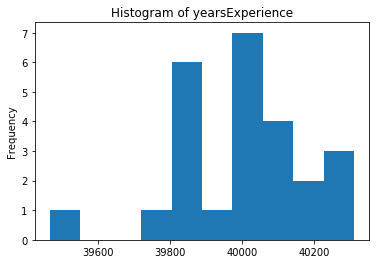

In [103]:
data_train.yearsExperience.value_counts().plot(kind='hist', title='Histogram of yearsExperience')

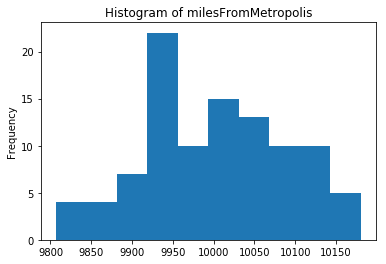

In [104]:
data_train.milesFromMetropolis.value_counts().plot(kind='hist', title='Histogram of milesFromMetropolis')

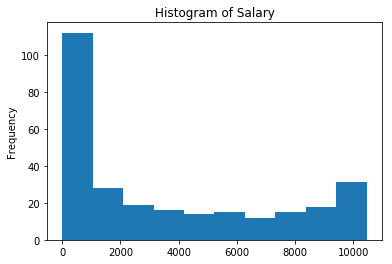

In [105]:
data_train.salary.value_counts().plot(kind='hist', title='Histogram of Salary')

<div class="alert alert-block alert-info">
The histograms for yearsExperience and milesFromMetropolis are slightly skewed to the left though there could be an outlier in milesFromMetropolis. The histogram for salary is u-shaped and fairly symmetric.
</div>

In [107]:
# Check unique values in string variables. 

data_train.jobType.unique()

array(['VICE_PRESIDENT', 'JUNIOR', 'JANITOR', 'CFO', 'CEO', 'SENIOR',
       'CTO', 'MANAGER'], dtype=object)

In [106]:
data_train.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

In [18]:
# Check sum of jobType value_counts above. Should sum to 1000000. Good way to confirm presence of missing values

data_train.jobType.value_counts().sum()

1000000

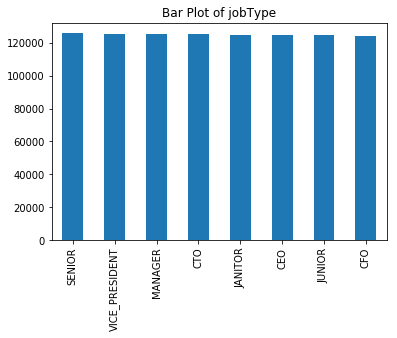

In [108]:
data_train.jobType.value_counts().plot(kind='bar', title='Bar Plot of jobType')

In [20]:
data_train.degree.unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [21]:
data_train.degree.value_counts()

HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

In [22]:
# Check sum of value_counts above. Should sum to 1000000

data_train.degree.value_counts().sum()

1000000

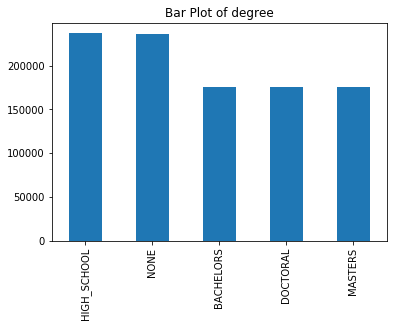

In [109]:
data_train.degree.value_counts().plot(kind='bar', title = 'Bar Plot of degree')

In [24]:
data_train.major.unique()

array(['MATH', 'NONE', 'PHYSICS', 'CHEMISTRY', 'COMPSCI', 'BIOLOGY',
       'LITERATURE', 'BUSINESS', 'ENGINEERING'], dtype=object)

In [25]:
data_train.major.value_counts()

NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

In [26]:
# Check sum of value_counts above. Should sum to 1000000

data_train.major.value_counts().sum()

1000000

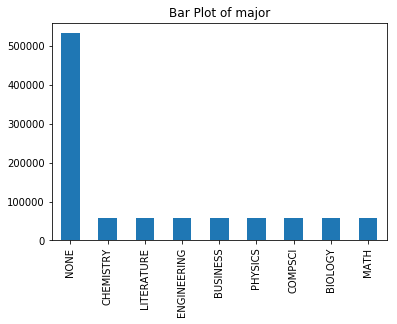

In [110]:
data_train.major.value_counts().plot(kind='bar', title='Bar Plot of major')

In [28]:
data_train.industry.unique()

array(['HEALTH', 'WEB', 'AUTO', 'FINANCE', 'EDUCATION', 'OIL', 'SERVICE'],
      dtype=object)

In [29]:
data_train.industry.value_counts()

WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [30]:
# Check sum of value_counts above. Should sum to 1000000

data_train.industry.value_counts().sum()

1000000

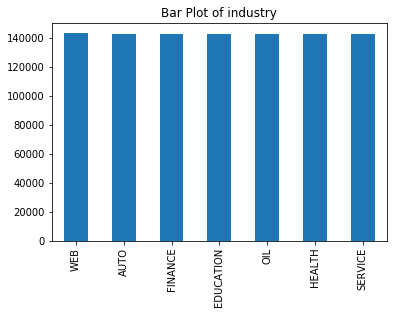

In [111]:
data_train.industry.value_counts().plot(kind='bar', title='Bar Plot of industry')

<div class="alert alert-block alert-info">
The features look pretty uniform with the exception of 'major' and 'degree' that have a lot of data on their left tail ends representing people with no college degree.
</div>

In [32]:
# Confirm that everyone with a highest education of 'HIGH_SCHOOL' does not have a major.
# Good way to check for errors in data entry.

no_major = data_train[data_train.degree == 'HIGH_SCHOOL'].major.unique()
print(no_major)

['NONE']


In [112]:
# Check for outliers and see if anything needs to be remedied
# Calculate IQR for salary

Q1 = data_train['salary'].quantile(0.25)
Q3 = data_train['salary'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)

print("The upper bound for salary is: ", upper_bound)
print("The lower bound for salary is: ", lower_bound)

The upper bound for salary is:  220.5
The lower bound for salary is:  8.5


In [113]:
# Check records with salary less than the lower_bound = 8.5

data_train[data_train.salary < lower_bound]

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
134412,652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
358344,816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
382936,828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0
492008,495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
639372,30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0


<div class="alert alert-block alert-info">
There are five records with a salary of 0. Given that they are all employees and most are at the mangerial level they should all have a salary > 0. Removing these records should not negatively affect the data.</div>

In [114]:
# Check records with salary greater than the upper_bound = 220.5

upper_outliers = data_train[data_train.salary > upper_bound]

upper_outliers.sort_values('salary').tail(10)

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
889287,377196,JOB1362684784883,COMP5,CEO,DOCTORAL,ENGINEERING,WEB,20,8,290
700605,47203,JOB1362684454890,COMP18,CEO,BACHELORS,BUSINESS,FINANCE,22,18,292
195315,884902,JOB1362685292589,COMP1,CTO,MASTERS,BUSINESS,FINANCE,24,2,292
136321,905713,JOB1362685313400,COMP35,CEO,DOCTORAL,BUSINESS,FINANCE,16,17,293
463787,503962,JOB1362684911649,COMP3,CEO,DOCTORAL,PHYSICS,OIL,24,1,293
435795,293221,JOB1362684700908,COMP44,CEO,DOCTORAL,ENGINEERING,OIL,19,18,294
125262,911747,JOB1362685319434,COMP3,CEO,BACHELORS,BUSINESS,FINANCE,24,28,294
135068,572777,JOB1362684980464,COMP60,CEO,MASTERS,ENGINEERING,OIL,22,1,298
941261,400611,JOB1362684808298,COMP45,CFO,DOCTORAL,ENGINEERING,OIL,23,3,301
834235,685562,JOB1362685093249,COMP47,CTO,MASTERS,ENGINEERING,OIL,24,0,301


In [115]:
upper_outliers.sort_values('yearsExperience').head(20)

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
736691,60050,JOB1362684467737,COMP27,CEO,DOCTORAL,ENGINEERING,OIL,0,41,227
844297,131150,JOB1362684538837,COMP35,CEO,BACHELORS,BUSINESS,FINANCE,0,11,221
647410,675479,JOB1362685083166,COMP14,CEO,DOCTORAL,ENGINEERING,OIL,1,5,223
53330,974802,JOB1362685382489,COMP8,CEO,DOCTORAL,BUSINESS,FINANCE,1,78,223
345149,671941,JOB1362685079628,COMP48,CEO,DOCTORAL,ENGINEERING,OIL,2,34,229
853950,500076,JOB1362684907763,COMP12,CEO,MASTERS,ENGINEERING,OIL,2,1,222
402937,61355,JOB1362684469042,COMP22,CFO,DOCTORAL,ENGINEERING,OIL,2,1,226
980064,698826,JOB1362685106513,COMP26,CFO,DOCTORAL,ENGINEERING,FINANCE,3,2,221
697774,279404,JOB1362684687091,COMP41,CFO,MASTERS,BUSINESS,FINANCE,3,6,232
413215,489248,JOB1362684896935,COMP7,CEO,MASTERS,ENGINEERING,OIL,3,9,231


<div class="alert alert-block alert-info">
Looking at 'yearsExperience' we can see that the records are for people in upper management and all work in Oil or Finance where salaries tend to be high. All in all, the records in the upper bound appear to be ok. Nothing needs to be removed here. </div>

In [116]:
# Remove records with salary = 0 from training data

data_train = data_train[data_train.salary != 0]

# Confirm the records have been removed by sorting the data on salary.

data_train.sort_values('salary').head(10)

# Drop 5 rows in test df
data_test_ft = data_test_ft[0:999995]
data_test_ft.shape

(999995, 8)

In [117]:
# Check that removing the data that had salary = 0 has not caused major changes to the data

data_train.describe()

,index,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000,999995.000000
mean,499999.177092,11.992407,49.529381,116.062398
std,288675.219219,7.212390,28.877721,38.717163
min,0.000000,0.000000,0.000000,17.000000
25%,249999.500000,6.000000,25.000000,88.000000
50%,499999.000000,12.000000,50.000000,114.000000
75%,749998.500000,18.000000,75.000000,141.000000
max,999999.000000,24.000000,99.000000,301.000000


<div class="alert alert-block alert-info">No major changes detected from removing records with salary = 0 </div>

### More Exploratory Data Analysis

Summary statistics obtained for each numeric variable during intial EDA show that
the average years of experience is about 12 years, average distance from the nearest metropolis is 
about 50 miles and the average salary is approximately 116.

Now we can look for any correlation between each of the feature variables and the target variable, salary.


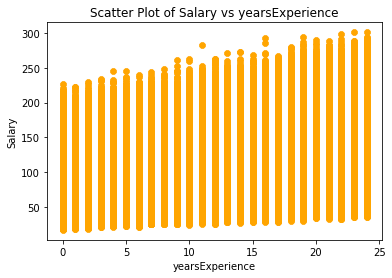

In [118]:
# Plot salary vs yearsExperience and visually check for any correlation

x1 = data_train.yearsExperience
y = data_train.salary

plt.scatter(x1,y, marker='8', color = 'orange')
plt.title("Scatter Plot of Salary vs yearsExperience")
plt.xlabel("yearsExperience")
plt.ylabel("Salary")
plt.show()


<div class="alert alert-block alert-info">
From the scatter plot we can see there is a positive correlation between yearsExperience and salary
</div>

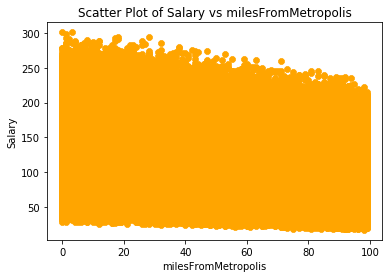

In [119]:
# Plot salary vs milesFromMetropolis and visually check for any correlation
x2 = data_train.milesFromMetropolis
y = data_train.salary

plt.scatter(x2,y, marker='8', color = 'orange')
plt.title("Scatter Plot of Salary vs milesFromMetropolis")
plt.xlabel("milesFromMetropolis")
plt.ylabel("Salary")
plt.show()

<div class="alert alert-block alert-info">
This scatter plot shows a negative correlation between milesFromMetropolis and salary. <br>

I decided to recode four of the categorical variables to see if there was any correlation with salary. Specifically, I recoded jobType, degree, major and industry.
</div>

In [120]:
# functions to recode the non-id string variables

def recode_degree(data):
    if data == 'NONE':
        return 1
    if data == 'HIGH_SCHOOL':
        return 2
    if data == 'BACHELORS':
        return 3
    if data == 'MASTERS':
        return 4
    else:
        return 5
    
def recode_major(data1):
    if data1 == 'NONE':
        return 1
    if data1 == 'CHEMISTRY': 
        return 2
    if data1 == 'LITERATURE':
        return 3
    if data1 == 'ENGINEERING':  
        return 4
    if data1 == 'BUSINESS':  
        return 5
    if data1 == 'PHYSICS': 
        return 6 
    if data1 == 'COMPSCI': 
        return 7
    if data1 == 'BIOLOGY':
        return 8 
    else:
        return 9

def recode_industry(data2):
    if data2 == 'WEB':
        return 1
    if data2 == 'AUTO':
        return 2
    if data2 == 'FINANCE':  
        return 3
    if data2 == 'EDUCATION':
        return 4
    if data2 == 'OIL':
        return 5
    if data2 == 'HEALTH':
        return 6
    else:
        return 7

def recode_jobType(data3):
    if data3 == 'JANITOR': 
        return 1
    if data3 == 'JUNIOR':
        return 2
    if data3 == 'SENIOR':
        return 3
    if data3 == 'MANAGER':
        return 4
    if data3 == 'VICE_PRESIDENT':
        return 5
    if data3 == 'CFO':
        return 6
    if data3 == 'CTO':
        return 7
    else:
        return 8

In [121]:
# Run recode functions on copy of training data. Confirm recoding and then delete original string variables

data_train_copy = data_train

data_train_copy['jobType_R'] = data_train_copy['jobType'].apply(recode_jobType)
data_train_copy['industry_R'] = data_train_copy['industry'].apply(recode_industry)
data_train_copy['major_R'] = data_train_copy['major'].apply(recode_major)
data_train_copy['degree_R'] = data_train_copy['degree'].apply(recode_degree)

In [122]:
# Compare counts between original and recoded variables to confirm recoding executed correctly

data_train.jobType.value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64

In [44]:
data_train_copy.jobType_R.value_counts()

3    125886
5    125234
4    125120
7    125045
1    124971
8    124778
2    124592
6    124369
Name: jobType_R, dtype: int64

In [45]:
data_train.industry.value_counts()

WEB          143205
AUTO         142941
FINANCE      142866
EDUCATION    142819
OIL          142770
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

In [46]:
data_train_copy.industry_R.value_counts()

1    143205
2    142941
3    142866
4    142819
5    142770
6    142755
7    142639
Name: industry_R, dtype: int64

In [47]:
data_train.major.value_counts()

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64

In [48]:
data_train_copy.major_R.value_counts()

1    532353
2     58875
3     58684
4     58594
5     58518
6     58410
7     58382
8     58379
9     57800
Name: major_R, dtype: int64

In [49]:
data_train.degree.value_counts()

HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64

In [50]:
data_train_copy.degree_R.value_counts()

2    236975
1    236853
3    175495
5    175362
4    175310
Name: degree_R, dtype: int64

<div class="alert alert-block alert-info">
The counts between the original and recoded string variables all match as expectd so that confirms the recoding functions executed correctly
</div>

In [123]:
# Delete extra columns

data_train_copy = data_train_copy.drop(columns=['jobType','degree', 'major', 'industry'])
data_train = data_train.drop(columns=['jobType_R', 'industry_R', 'major_R', 'degree_R']) 

In [124]:
data_train.head()

,index,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,323556,JOB1362684731243,COMP37,VICE_PRESIDENT,HIGH_SCHOOL,NONE,HEALTH,6,77,101
1,17105,JOB1362684424792,COMP52,JUNIOR,MASTERS,MATH,WEB,7,51,106
2,338846,JOB1362684746533,COMP34,JANITOR,HIGH_SCHOOL,NONE,AUTO,10,17,76
3,320851,JOB1362684728538,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,3,11,39
4,39358,JOB1362684447045,COMP26,CFO,HIGH_SCHOOL,NONE,HEALTH,5,30,109


In [125]:
data_train_copy.head()

,index,jobId,companyId,yearsExperience,milesFromMetropolis,salary,jobType_R,industry_R,major_R,degree_R
0,323556,JOB1362684731243,COMP37,6,77,101,5,6,1,2
1,17105,JOB1362684424792,COMP52,7,51,106,2,1,9,4
2,338846,JOB1362684746533,COMP34,10,17,76,1,2,1,2
3,320851,JOB1362684728538,COMP26,3,11,39,1,4,1,2
4,39358,JOB1362684447045,COMP26,5,30,109,6,6,1,2


### Now we can continue checking for correlation between variables

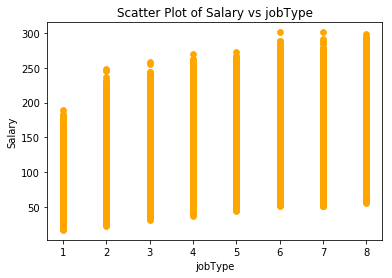

In [126]:
# Plot salary vs jobType and visually check for any correlation
x3 = data_train_copy.jobType_R
y = data_train_copy.salary

plt.scatter(x3,y, marker='8', color = 'orange')
plt.title("Scatter Plot of Salary vs jobType")
plt.xlabel("jobType")
plt.ylabel("Salary")
plt.show()

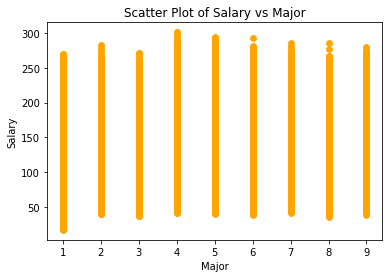

In [127]:
# Plot salary vs major and visually check for any correlation
x4 = data_train_copy.major_R
y = data_train_copy.salary

plt.scatter(x4,y, marker='8', color = 'orange')
plt.title("Scatter Plot of Salary vs Major")
plt.xlabel("Major")
plt.ylabel("Salary")
plt.show()

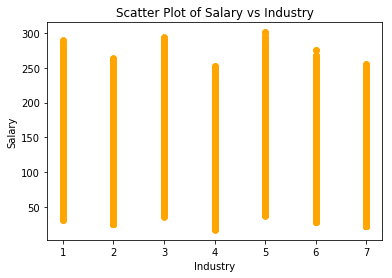

In [56]:
# Plot salary vs industry and visually check for any correlation
x5 = data_train_copy.industry_R
y = data_train_copy.salary

plt.scatter(x5,y, marker='8', color = 'orange')
plt.title("Scatter Plot of Salary vs Industry")
plt.xlabel("Industry")
plt.ylabel("Salary")
plt.show()

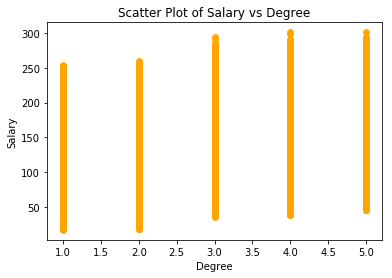

In [57]:
# Plot salary vs degree and visually check for any correlation
x6 = data_train_copy.degree_R
y = data_train_copy.salary

plt.scatter(x6,y, marker='8', color = 'orange')
plt.title("Scatter Plot of Salary vs Degree")
plt.xlabel("Degree")
plt.ylabel("Salary")
plt.show()

<div class="alert alert-block alert-info">
From the graphs we can see that there is a positive corelation betwen salary and jobType as well as salary and degree but little correlation between salary and industry or major <br>
    
This makes sense because you typically see changes in pay grade based on degree type and also years of experience. With the exception of specialist positions like in healthcare, people often work in fields outside of what they majored in in college.
</div>

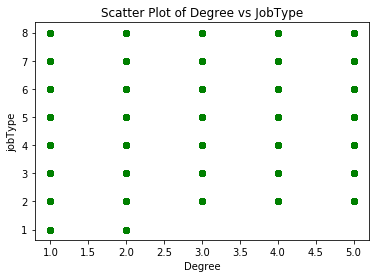

In [128]:
# Plot degree vs jobType and visually check for any correlation
x7 = data_train_copy.degree_R
y = data_train_copy.jobType_R

plt.scatter(x7,y, marker='8', color = 'green')
plt.title("Scatter Plot of Degree vs JobType")
plt.xlabel("Degree")
plt.ylabel("jobType")
plt.show()

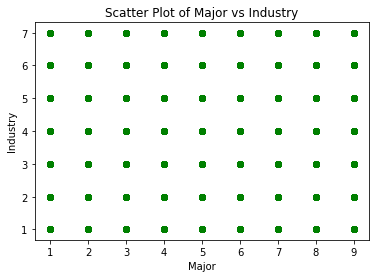

In [59]:
# Plot Major vs Industry and visually check for any correlation
x8 = data_train_copy.major_R
y = data_train_copy.industry_R

plt.scatter(x8,y, marker='8', color = 'green')
plt.title("Scatter Plot of Major vs Industry")
plt.xlabel("Major")
plt.ylabel("Industry")
plt.show()

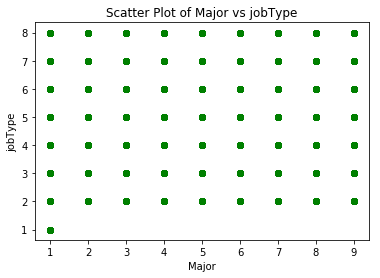

In [60]:
# Plot Major vs jobType and visually check for any correlation
x9 = data_train_copy.major_R
y = data_train_copy.jobType_R

plt.scatter(x9,y, marker='8', color = 'green')
plt.title("Scatter Plot of Major vs jobType")
plt.xlabel("Major")
plt.ylabel("jobType")
plt.show()

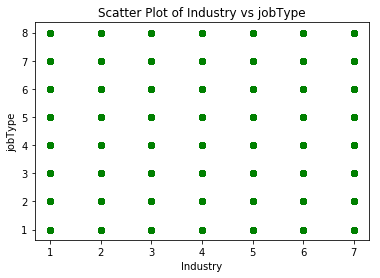

In [61]:
# Plot Industry vs jobType and visually check for any correlation
x10 = data_train_copy.industry_R
y = data_train_copy.jobType_R

plt.scatter(x10, y, marker='8', color = 'green')
plt.title("Scatter Plot of Industry vs jobType")
plt.xlabel("Industry")
plt.ylabel("jobType")
plt.show()

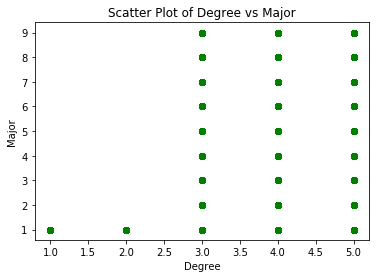

In [62]:
# Plot Degree vs Major and visually check for any correlation
x11 = data_train_copy.degree_R
y = data_train_copy.major_R

plt.scatter(x11,y, marker='8', color = 'green')
plt.title("Scatter Plot of Degree vs Major")
plt.xlabel("Degree")
plt.ylabel("Major")
plt.show()

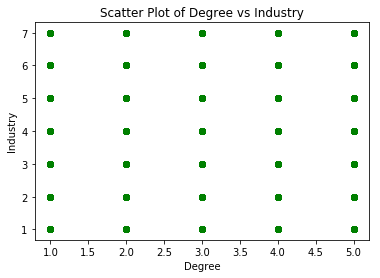

In [63]:
# Plot Major vs jobType and visually check for any correlation
x12 = data_train_copy.degree_R
y = data_train_copy.industry_R

plt.scatter(x12,y, marker='8', color = 'green')
plt.title("Scatter Plot of Degree vs Industry")
plt.xlabel("Degree")
plt.ylabel("Industry")
plt.show()

<div class="alert alert-block alert-info">
In the graph for major vs degree, we see a sudden change in the graph when degree >= 3 (BACHELORS). This is because people with no major either had a high school diploma or no high school diploma. 
<br>

All in all, no correlation seen between any combination of two variables between major, jobType, industry or degree.

    

</div>

### Baseline Model

We can create a baseline model using the average salary for each industry in the data and later compare this model to a few other different models to see which one is best.

In [129]:
# Calculate the average salary for each industry. These will be the forecasted values for salary for each of the industries.

data_train.groupby(['industry']).mean()

,index,yearsExperience,milesFromMetropolis,salary
industry,,,,
AUTO,499476.982671,11.974717,49.553746,109.435222
EDUCATION,501121.012218,12.000105,49.586442,99.448386
FINANCE,499475.500028,12.009673,49.532940,130.747659
HEALTH,499621.863626,11.972856,49.501061,115.735540
OIL,499661.457827,12.006563,49.490474,130.953863
SERVICE,499705.025519,11.994665,49.577878,104.446820
WEB,500929.845145,11.988290,49.463315,121.645362


In [130]:
# create variable that holds the mean for each industry as the forecasted salaries for the mean model

def salary_forecast(industry):
    if industry == 'AUTO':
        return 109.5222
    if industry == 'EDUCATION':
        return 99.48386
    if industry == 'FINANCE':
        return 130.747659
    if industry == 'HEALTH':
        return 115.735540
    if industry == 'OIL':
        return 130.953863
    if industry == 'SERVICE':
        return 104.46820
    else:
        return 121.645362

In [131]:
data_train2 = data_train
data_train2['salary_forecast'] = data_train2['industry'].apply(salary_forecast)

In [132]:
# Calculate mean squared error and stanard deviation for this baseline model

y_true = data_train2['salary']
y_pred = data_train2['salary_forecast']



print("-------Baseline Model-------")
print("Average MSE:\n", round(mean_squared_error(y_true, y_pred),3))
print("Standard deviation:\n", round(np.std(data_train2['salary_forecast']),3))


-------Baseline Model-------
Average MSE:
 1367.124
Standard deviation:
 11.467


### The Models
We now have a baseline model and  can proceed with building a few other models that may yield a lower mean squared error. <br>
We are going to use the following algorithms to build the models: <br>
- Linear Regression
- Random Forest Regressor
- Stochastic Gradient Descent Regressor
- Gradient Booster Regressor

In [69]:
# Before building the models we can perform one-hot-encoding on the categorical data in both the testing and training dataframes

cat_columns = ['jobType', 'degree', 'major', 'industry']
num_columns = ['yearsExperience', 'milesFromMetropolis']

cat_encoded_df = pd.get_dummies(data_train[cat_columns])
test_cat = pd.get_dummies(data_test_ft[cat_columns])

# Merge categorical and numeric columns in training data and do the same for testing data

features_enc_df = pd.concat([cat_encoded_df, data_train[num_columns]], axis = 1)
test_enc_df = pd.concat([test_cat, data_test_ft[num_columns]], axis = 1)

target = data_train['salary']
print("Test data shape: ", test_enc_df.shape)
print("Training data shape: ", (features_enc_df.shape))

Test data shape:  (999995, 31)
Training data shape:  (999995, 31)


In [33]:
features_enc_df.head()

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,10,83
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,73
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,10,38
3,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,8,17
4,0,0,0,0,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,8,16


In [16]:
features_enc_df.shape

(999995, 31)

In [17]:
test_enc_df.shape

(999995, 31)

In [133]:
# Create Linear Regression model

model_LR = LinearRegression()
model_LR.fit(features_enc_df, target)

predictions_LR = model_LR.predict(test_enc_df)

cv5 = cross_val_score(model_LR,features_enc_df, target, cv=5, scoring='neg_mean_squared_error')
print("-------Linear Regression-------")
print(model_LR)
print("Average MSE:\n", round(-1*np.mean(cv5),3))
print("Standard deviation from cross validation:\n", round(np.std(cv5),3))

-------Linear Regression-------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Average MSE:
 384.415
Standard deviation from cross validation:
 1.782


In [88]:
# Create Random Forest model, calculate cross validation standard deviation and mean squared error

model_RF = RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=25, min_samples_split=50, max_features=25, verbose=0, random_state = 42)
model_RF.fit(features_enc_df, target)

predictions_RF = model_RF.predict(test_enc_df)

cv5 = cross_val_score(model_RF,features_enc_df, target, cv=5, scoring='neg_mean_squared_error')
print("-------Random Forest-------")
print(model_RF)
print("Average MSE:\n", round(-1*np.mean(cv5),3))
print("Standard deviation from cross validation:\n", round(np.std(cv5),3))

-------Random Forest-------
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=25, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=2, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
Average MSE:
 365.248
Standard deviation from cross validation:
 1.611


In [92]:
model_SGDR = SGDRegressor(alpha = 0.05, loss="squared_loss", penalty=None, tol=1e-3)
model_SGDR.fit(features_enc_df, target)

predictions_SGDR = model_SGDR.predict(test_enc_df)

cv5 = cross_val_score(model_SGDR,features_enc_df, target, cv=5, scoring='neg_mean_squared_error')
print("-------Stochastic Gradient Descent Regression-------")
print(model_SGDR)
print("Average MSE:\n", round(-1*np.mean(cv5),3))
print("Standard deviation from cross validation:\n", round(np.std(cv5),3))

-------Stochastic Gradient Descent Regression-------
SGDRegressor(alpha=0.05, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)
Average MSE:
 431.88
Standard deviation from cross validation:
 62.311


In [134]:
model_GBR = GradientBoostingRegressor(n_estimators=100, max_depth=7, loss='ls', verbose=0)
model_GBR.fit(features_enc_df, target)

predictions_GBR = model_GBR.predict(test_enc_df)

cv5 = cross_val_score(model_GBR,features_enc_df, target, cv=5, scoring='neg_mean_squared_error')
print("-------Gradient Boosting Regression-------")
print(model_GBR)
print("Average MSE:\n", round(-1*np.mean(cv5),3))
print("Standard deviation from cross validation:\n", round(np.std(cv5),3))

-------Gradient Boosting Regression-------
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Average MSE:
 357.1
Standard deviation from cross validation:
 1.503


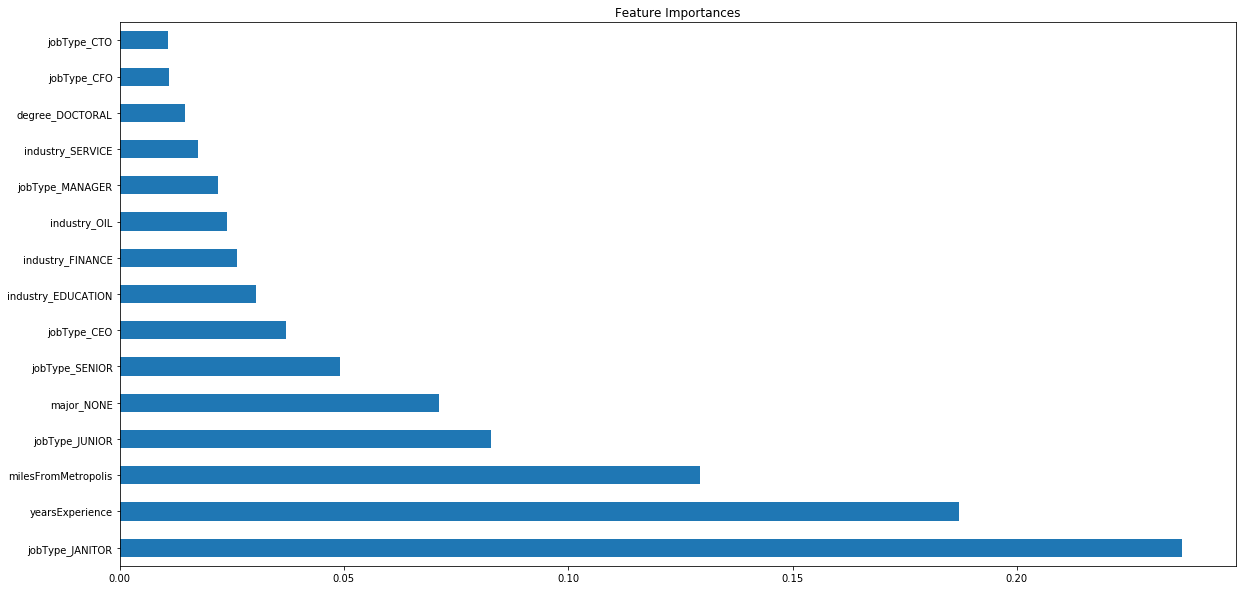

In [135]:
# Plot feature importances
pd.Series(model_GBR.feature_importances_, index=features_enc_df.columns).nlargest(15).plot(kind='barh', title = 'Feature Importances', figsize=(20,10))  
